In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df= pd.read_csv('Florida_2024-08-12_2024-08-26_1724672927.csv')
df['tid']=pd.to_datetime(df['Dato'] + ' ' + df['Tid'])
df=df.set_index('tid')
df

,Dato,Tid,Vindretning,Vindstyrke,Vindkast
tid,,,,,
2024-08-12 00:00:00,2024-08-12,00:00,139.0,1.6,2.7
2024-08-12 00:10:00,2024-08-12,00:10,137.0,1.9,2.7
2024-08-12 00:20:00,2024-08-12,00:20,141.0,1.9,2.7
2024-08-12 00:30:00,2024-08-12,00:30,143.0,1.8,2.7
2024-08-12 00:40:00,2024-08-12,00:40,153.0,2.3,3.3
...,...,...,...,...,...
2024-08-25 23:10:00,2024-08-25,23:10,139.0,6.1,11.0
2024-08-25 23:20:00,2024-08-25,23:20,139.0,6.7,11.3
2024-08-25 23:30:00,2024-08-25,23:30,140.0,7.1,11.9


<Axes: xlabel='tid'>

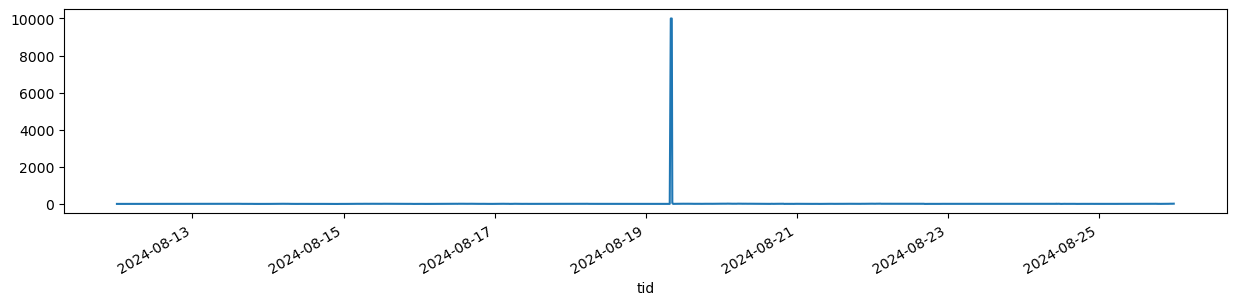

In [54]:

df.Vindkast.plot(figsize=(15, 3))

Manglende data, 9999.99 -> NaN

<Axes: xlabel='tid'>

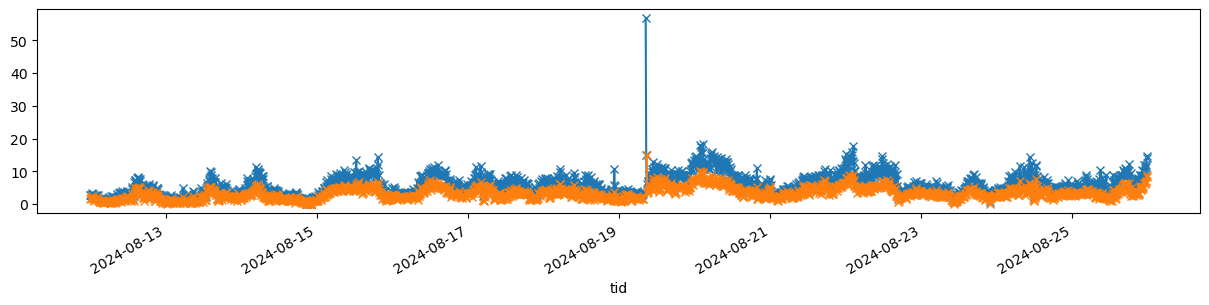

In [55]:
df.replace(9999.99, np.nan, inplace=True)
df.Vindkast.plot(marker='x',figsize=(15, 3))
df.Vindstyrke.plot(marker='x',figsize=(15, 3))

Uteligger: 

Set den 

In [78]:
df_remove=df#.copy()
df_remove.loc[df['Vindkast'] > 20] = np.nan

In [79]:
df

,Dato,Tid,Vindretning,Vindstyrke,Vindkast
tid,,,,,
2024-08-12 00:00:00,2024-08-12,00:00,139.0,1.6,2.7
2024-08-12 00:10:00,2024-08-12,00:10,137.0,1.9,2.7
2024-08-12 00:20:00,2024-08-12,00:20,141.0,1.9,2.7
2024-08-12 00:30:00,2024-08-12,00:30,143.0,1.8,2.7
2024-08-12 00:40:00,2024-08-12,00:40,153.0,2.3,3.3
...,...,...,...,...,...
2024-08-25 23:10:00,2024-08-25,23:10,139.0,6.1,11.0
2024-08-25 23:20:00,2024-08-25,23:20,139.0,6.7,11.3
2024-08-25 23:30:00,2024-08-25,23:30,140.0,7.1,11.9


<Axes: xlabel='tid'>

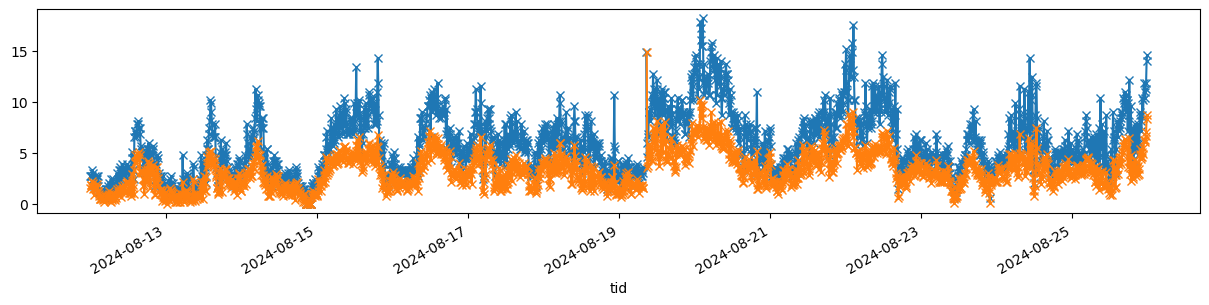

In [80]:

df_remove.Vindkast.plot(marker='x',figsize=(15, 3))
df_remove.Vindstyrke.plot(marker='x',figsize=(15, 3))

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_75232/3731546260.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(df.index[i], 0,  np.cos(directions_rad[i]), np.sin(directions_rad[i]),


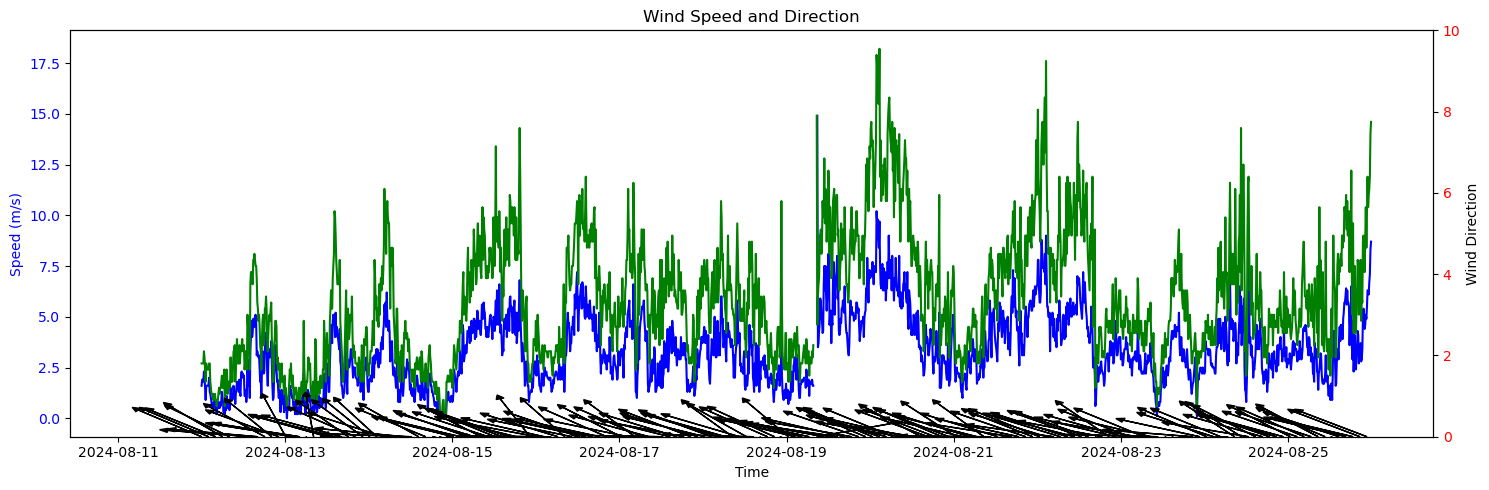

In [93]:
# Plotting wind speed as a line
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot( df['Vindstyrke'], 'b-', label='Vindstyrke')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.plot( df['Vindkast'], 'g-', label='Vind kast')

# Plotting wind direction as arrows
ax2 = ax1.twinx()
ax2.set_ylabel('Wind Direction')

# Convert direction to radians for plotting
directions_rad = np.deg2rad(df['Vindretning'])

# Plot arrows
for i in range(0, len(df), 12):
    ax2.arrow(df.index[i], 0,  np.cos(directions_rad[i]), np.sin(directions_rad[i]),
              head_width=0.1, head_length=  0.1, fc='k', ec='k')
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Wind Speed and Direction')
fig.tight_layout()
plt.show()
